In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d akshatgupta7/crop-yield-in-indian-states-dataset

  0% 0.00/476k [00:00<?, ?B/s]
100% 476k/476k [00:00<00:00, 97.6MB/s]


In [ ]:
!unzip crop-yield-in-indian-states-dataset.zip

Archive:  crop-yield-in-indian-states-dataset.zip
  inflating: crop_yield.csv          


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('crop_yield.csv')

In [ ]:
import pandas as pd

In [ ]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
df.shape

(19689, 10)

In [ ]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [ ]:
df.nunique()

Crop                  55
Crop_Year             24
Season                 6
State                 30
Area               13644
Production         14016
Annual_Rainfall      634
Fertilizer         18598
Pesticide          17405
Yield              13551
dtype: int64

In [ ]:
crop_counts = df['Crop'].value_counts()
crop_counts

Rice                     1197
Maize                     975
Moong(Green Gram)         740
Urad                      733
Groundnut                 725
Sesamum                   685
Potato                    628
Sugarcane                 605
Wheat                     545
Rapeseed &Mustard         528
Bajra                     524
Jowar                     513
Arhar/Tur                 508
Ragi                      498
Gram                      490
Small millets             485
Cotton(lint)              476
Onion                     454
Sunflower                 441
Dry chillies              419
Other Kharif pulses       382
Horse-gram                371
Peas & beans (Pulses)     369
Tobacco                   364
Other  Rabi pulses        355
Soyabean                  349
Turmeric                  337
Masoor                    324
Ginger                    323
Linseed                   308
Castor seed               300
Barley                    297
Sweet potato              273
Garlic    

In [ ]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
data_types = df.dtypes
numerical_columns = data_types[data_types != 'object'].index.tolist()
categorical_columns = data_types[data_types == 'object'].index.tolist()

print("Numerical Columns:",numerical_columns)
print("Categorical Columns:",categorical_columns)

Numerical Columns: ['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']
Categorical Columns: ['Crop', 'Season', 'State']


In [ ]:
corr_mat = df.corr()

<ipython-input-28-9a68d4d0646f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


In [ ]:
corr_mat

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,1.000000,-0.035686,0.003366,-0.011187,0.011169,-0.004657,0.002539
Area,-0.035686,1.000000,0.037441,-0.106054,0.973255,0.973479,0.001858
Production,0.003366,0.037441,1.000000,0.029879,0.039799,0.035171,0.570809
Annual_Rainfall,-0.011187,-0.106054,0.029879,1.000000,-0.109734,-0.097657,0.020761
Fertilizer,0.011169,0.973255,0.039799,-0.109734,1.000000,0.954991,0.002862
Pesticide,-0.004657,0.973479,0.035171,-0.097657,0.954991,1.000000,0.001782
Yield,0.002539,0.001858,0.570809,0.020761,0.002862,0.001782,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

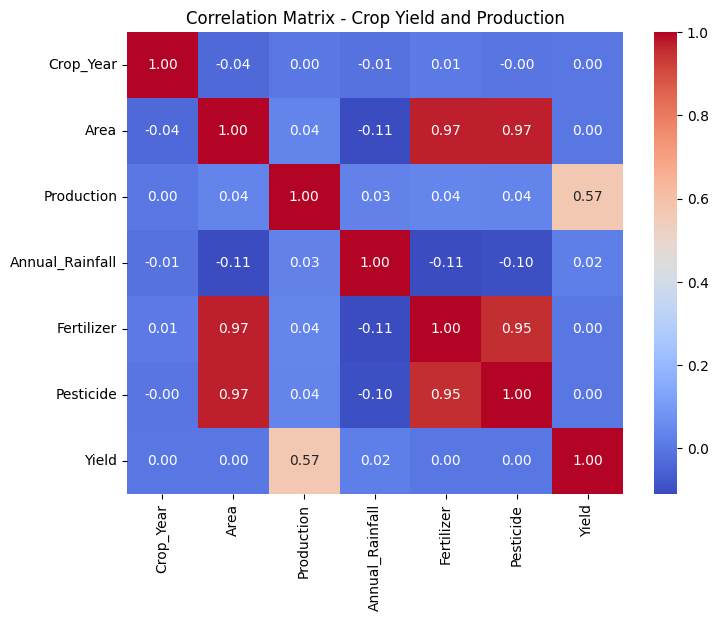

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Crop Yield and Production')
plt.show()

In [ ]:
df_year = df[df['Crop_Year']!=2020]  # As the data of 2020 is incomplete

In [ ]:
year_yield = df_year.groupby('Crop_Year').mean()
year_yield

<ipython-input-33-5634a6f3f62b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_yield = df_year.groupby('Crop_Year').mean()


,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,,,,,,
1997,405045.302439,1.484637e+07,1595.778293,3.854816e+07,125564.043756,63.872577
1998,232389.749226,1.217970e+07,1762.342879,2.296011e+07,67393.027276,55.938462
1999,226242.143077,1.315389e+07,1590.549135,2.401108e+07,61085.378631,76.943722
2000,191098.094560,1.238662e+07,1450.290042,1.876010e+07,49685.504585,75.572901
2001,194259.106227,1.241942e+07,1406.769550,1.983968e+07,50507.367619,75.441594
2002,175197.259890,1.522620e+07,1276.836457,1.658592e+07,43799.314972,80.656215
2003,186887.444619,1.537292e+07,1417.740044,1.849812e+07,44852.986709,83.694593
2004,188087.005037,1.755663e+07,1450.049253,2.037735e+07,39498.271058,81.201928
2005,182390.029914,1.843552e+07,1462.180610,2.187221e+07,38301.906282,86.486543


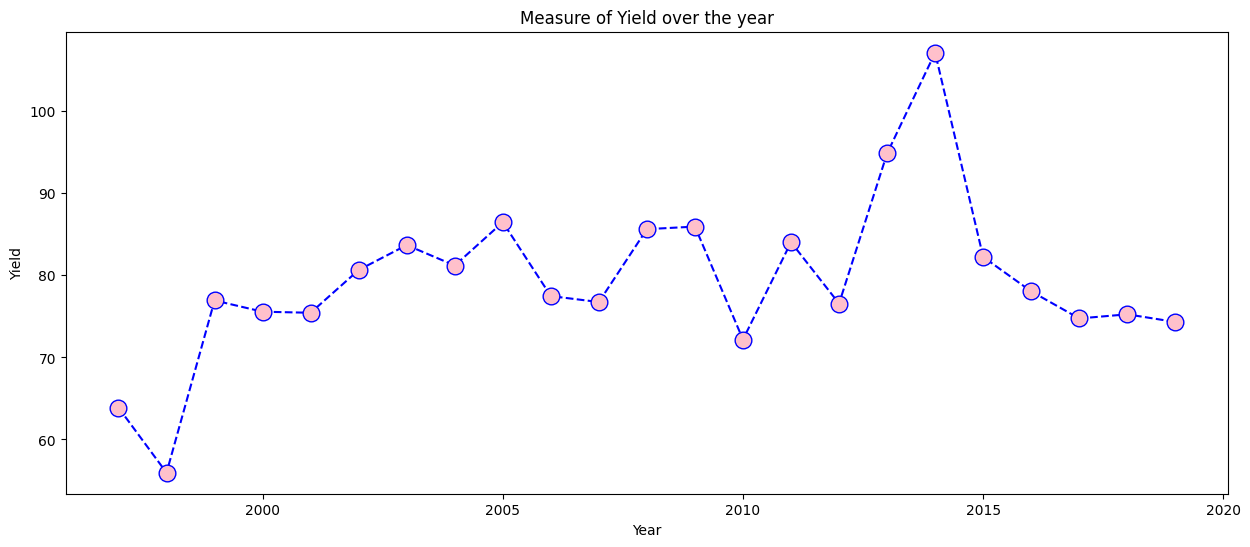

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(year_yield.index, year_yield['Yield'], color='blue', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='pink')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Measure of Yield over the year')
plt.show()

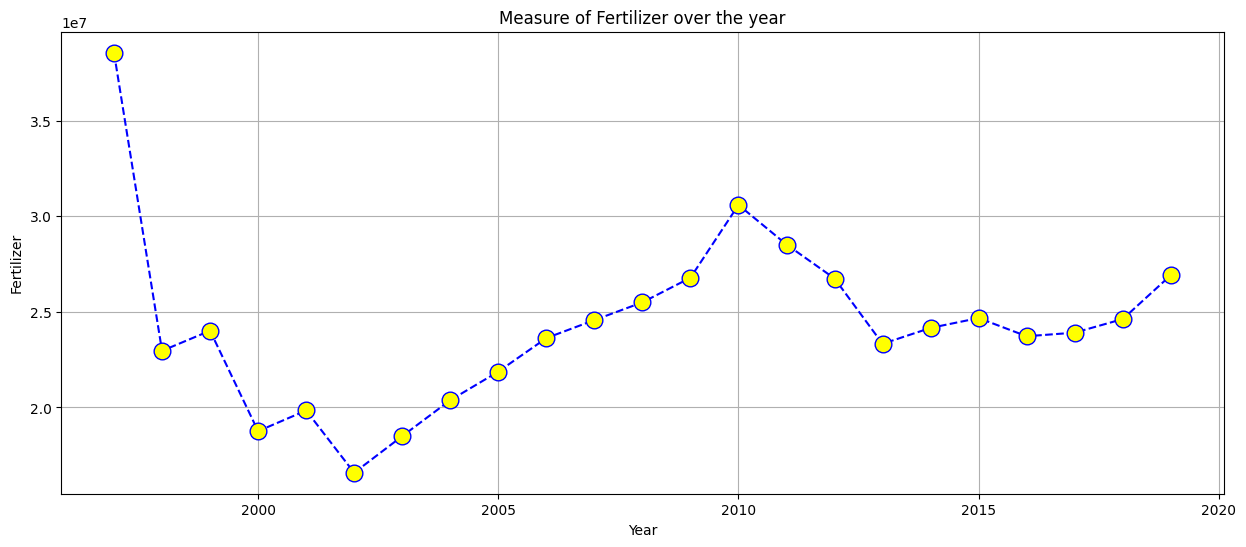

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(year_yield.index, year_yield['Fertilizer'], color='blue', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Fertilizer')
plt.grid()
plt.title('Measure of Fertilizer over the year')
plt.show()

use of fertilizers from 2015 has been increasing and the yield is decresing

In [ ]:
# plt.figure(figsize = (15,6))
# plt.plot(year_yield.index, year_yield['Pesticide'], color='green', linestyle='dashed', marker='o',
#         markersize=12, markerfacecolor='orange')
# plt.xlabel('Year')
# plt.ylabel('Pesticide')
# plt.title('Measure of pesticide over the year')
# plt.show()

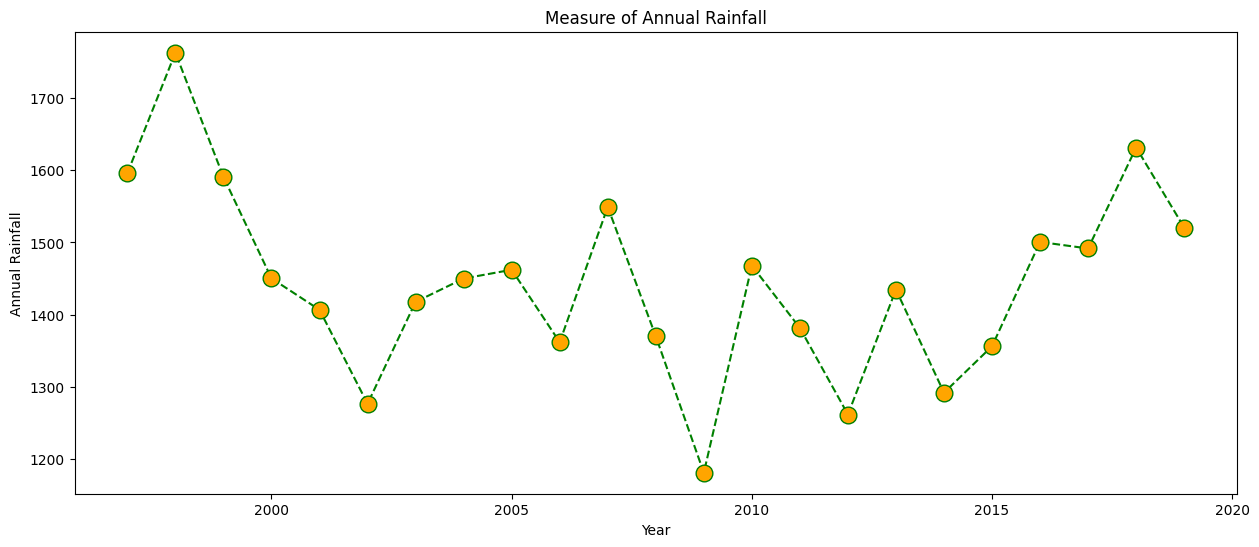

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(year_yield.index, year_yield['Annual_Rainfall'], color='green', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='orange')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall')
plt.title('Measure of Annual Rainfall')
plt.show()

In [ ]:
df.nunique()

Crop                  55
Crop_Year             24
Season                 6
State                 30
Area               13644
Production         14016
Annual_Rainfall      634
Fertilizer         18598
Pesticide          17405
Yield              13551
dtype: int64

In [ ]:
df_state = (df.groupby('State').mean()).sort_values(by='Yield')
df_state

<ipython-input-38-5ac5fa6086c3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_state = (df.groupby('State').mean()).sort_values(by='Yield')


,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
State,,,,,,,
Sikkim,2007.933628,7784.951327,1.214569e+04,2570.335298,1.018526e+06,2073.249204,1.232856
Jammu and Kashmir,2010.231379,29703.941363,4.801645e+04,1191.772108,4.016989e+06,8147.768003,1.308051
Himachal Pradesh,2009.318182,28912.675000,5.243044e+04,1147.486201,3.880694e+06,7689.492620,1.899496
Chhattisgarh,2009.684153,120804.583607,1.563897e+05,1267.046120,1.671449e+07,32165.368077,1.966733
Mizoram,2008.694712,3707.186226,6.656750e+03,2435.757834,4.796648e+05,977.935183,2.569245
Meghalaya,2008.815100,7979.624037,2.544935e+04,4043.080340,1.075203e+06,2193.008166,2.878788
Odisha,2007.807895,164008.763158,2.553688e+05,1445.279474,2.189292e+07,43928.352132,3.141251
Nagaland,2009.856313,12230.379826,2.721147e+04,1545.550732,1.684754e+06,3369.676225,3.402534
Madhya Pradesh,2008.786982,582352.656166,9.875625e+05,1003.348284,7.939409e+07,160935.836715,3.457816


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
average_yield_by_state = df.groupby('State')['Yield'].mean()

fig = px.bar(average_yield_by_state, x=average_yield_by_state.index, y='Yield', color=average_yield_by_state.index,
             labels={'x': 'State', 'Yield': 'Average Yield'}, title='Average Yield by State')
fig.update_layout(xaxis_title='State', xaxis_tickangle=-45)
fig.show()

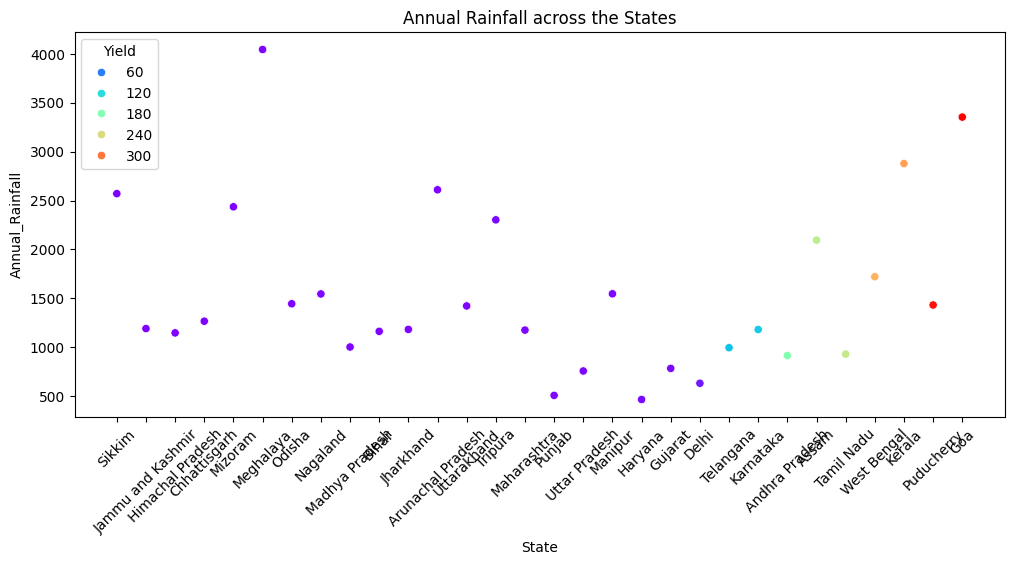

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df_state.index, y = df_state['Annual_Rainfall'], palette='rainbow', hue = df_state['Yield'])
plt.xticks(rotation=45)
plt.title('Annual Rainfall across the States')
plt.show()

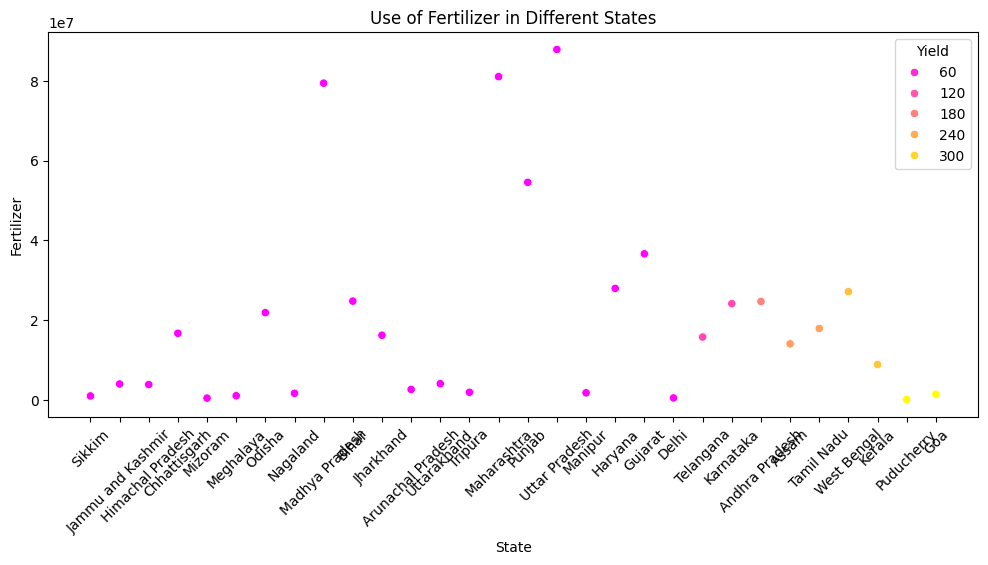

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df_state.index, y=df_state['Fertilizer'], palette='spring', hue = df_state['Yield'])
plt.xticks(rotation=45)
plt.title('Use of Fertilizer in Different States')
plt.show()

In [ ]:
df_Seas = df[df['Season']!='Whole Year ']

df_season = df_Seas.groupby('Season').sum()
df_season

<ipython-input-43-f61ee21f2d70>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Season,,,,,,,
Autumn,832058,5.862637e+07,84406651,7.031759e+05,7.696200e+09,1.552829e+07,1621.837556
Kharif,16538965,1.702742e+09,5402484780,1.131835e+07,2.282723e+11,4.624902e+08,20431.840607
Rabi,11539594,1.172588e+09,2837368229,7.970757e+06,1.564345e+11,3.218366e+08,11418.068860
Summer,2402524,9.879112e+07,243731156,1.565900e+06,1.371903e+10,2.732111e+07,3581.857123
Winter,781718,2.806847e+08,586507936,6.709910e+05,3.811857e+10,7.590270e+07,2056.746957


In [ ]:
fig = px.bar(df_season, y = 'Area', color=df_season.index, hover_data=['Area'],text = 'Area')
fig.show()

In [ ]:
fig = px.sunburst(df_season, path=[df_season.index, 'Yield'], values='Yield',
                  color=df_season.index, hover_data=['Yield'])
fig.show()

Area under cultivation in Kharif season is highest, second is Rabi season

Crops in autumn, winter are not grown over large area

Yield in India is maximum in Kharif season

In [ ]:
df_ynz = df[df['Yield']>0]  # where yield is more than zero
df_crop = df_ynz.groupby('Crop').sum()
df_crop

<ipython-input-46-e1c14446ce72>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop,,,,,,,
Arecanut,321347,8.765158e+06,39144261,3.414578e+05,1.226556e+09,2.449481e+06,3.359289e+02
Arhar/Tur,1020541,8.235357e+07,60913833,7.103078e+05,1.121027e+10,2.280705e+07,4.914127e+02
Bajra,1052589,9.335810e+07,118137047,5.566748e+05,1.205114e+10,2.465983e+07,1.271990e+03
Banana,488061,7.127321e+06,226471979,4.199956e+05,9.805713e+08,1.916819e+06,6.578526e+03
Barley,596557,9.270084e+06,19498687,3.474722e+05,1.190739e+09,2.472432e+06,4.738754e+02
Black pepper,253163,4.362226e+06,2095650,2.700002e+05,5.699445e+08,1.150606e+06,1.045302e+02
Cardamom,146569,1.305532e+06,255490,1.241488e+05,1.714790e+08,3.433323e+05,1.245829e+01
Cashewnut,265313,7.472794e+06,3737207,2.581485e+05,1.005401e+09,2.003926e+06,4.181387e+02
Castor seed,602681,1.659632e+07,24049211,4.144262e+05,2.248189e+09,4.560667e+06,2.080828e+02


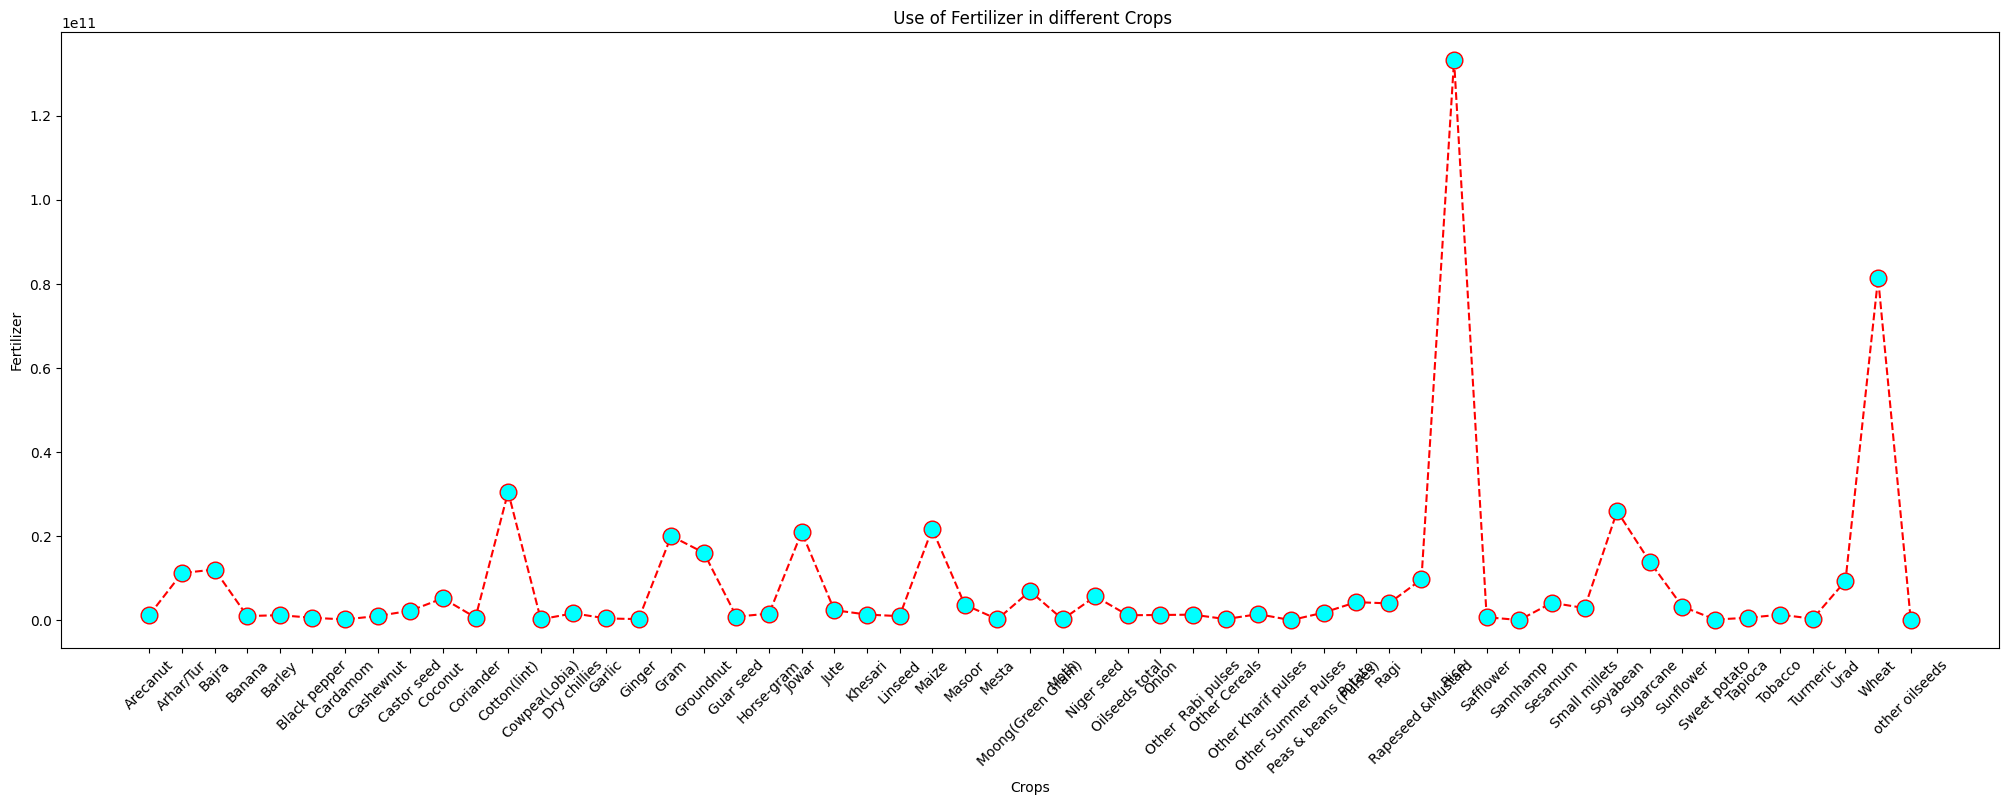

In [ ]:
plt.figure(figsize = (25,8))
plt.plot(df_crop.index, df_crop['Fertilizer'],color='red', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='cyan')
plt.xlabel('Crops')
plt.ylabel('Fertilizer')
plt.title(' Use of Fertilizer in different Crops')
plt.xticks(rotation=45)
plt.show()

The use of fertilizer is highest in rice,second is wheat